<a href="https://colab.research.google.com/github/vfrantc/AWAN/blob/master/90_dibas_color_summary_on_the_whole_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install livelossplot
!pip install -q git+git://github.com/vfrantc/matilda.git

     |████████████████████████████████| 320.4MB 43kB/s 


In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

from sklearn.preprocessing.label import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import matilda as mt
from tqdm import tqdm
from glob import glob

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.preprocessing.label module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp /content/drive/My\ Drive/reconstructed_bacteria_paper/data.zip .
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/Acinetobacter_baumanii/
  inflating: data/Acinetobacter_baumanii/Acinetobacter.baumanii_0001.tif.png  
  inflating: data/Acinetobacter_baumanii/Acinetobacter.baumanii_0002.tif.png  
  inflating: data/Acinetobacter_baumanii/Acinetobacter.baumanii_0003.tif.png  
  inflating: data/Acinetobacter_baumanii/Acinetobacter.baumanii_0004.tif.png  
  inflating: data/Acinetobacter_baumanii/Acinetobacter.baumanii_0005.tif.png  
  inflating: data/Acinetobacter_baumanii/Acinetobacter.baumanii_0006.tif.png  
  inflating: data/Acinetobacter_baumanii/Acinetobacter.baumanii_0007.tif.png  
  inflating: data/Acinetobacter_baumanii/Acinetobacter.baumanii_0008.tif.png  
  inflating: data/Acinetobacter_baumanii/Acinetobacter.baumanii_0009.tif.png  
  inflating: data/Acinetobacter_baumanii/Acinetobacter.baumanii_0010.tif.png  
  inflating: data/Acinetobacter_baumanii/Acinetobacter.baumanii_0011.tif.png  
  inflating: data/Acinetobacter_baumanii/Acinetobac

In [5]:
class_names = [f.split('/')[1] for f in glob('data/*')]
files = []
labels = []
for class_name in class_names:
  files_of_the_class = glob(os.path.join('data', class_name, '*.png'))
  for file in files_of_the_class:
    files.append(file)
    labels.append(class_name)

In [6]:
print(len(files), 
      len(labels), 
      len(labels[0]), 
      np.unique(labels), 
      'classes: ', 
      len(class_names))

689 689 15 ['Acinetobacter_baumanii' 'Actinomyces_israeli' 'Bacteroides_fragilis'
 'Bifidobacterium_spp' 'Candida_albicans' 'Clostridium_perfringens'
 'Enterococcus_faecalis' 'Enterococcus_faecium' 'Escherichia_coli'
 'Fusobacterium' 'Lactobacillus_casei' 'Lactobacillus_crispatus'
 'Lactobacillus_delbrueckii' 'Lactobacillus_gasseri'
 'Lactobacillus_jehnsenii' 'Lactobacillus_johnsonii'
 'Lactobacillus_paracasei' 'Lactobacillus_plantarum'
 'Lactobacillus_reuteri' 'Lactobacillus_rhamnosus'
 'Lactobacillus_salivarius' 'Listeria_monocytogenes' 'Micrococcus_spp'
 'Neisseria_gonorrhoeae' 'Porfyromonas_gingivalis'
 'Propionibacterium_acnes' 'Proteus' 'Pseudomonas_aeruginosa'
 'Staphylococcus_aureus' 'Staphylococcus_epidermidis'
 'Staphylococcus_saprophiticus' 'Streptococcus_agalactiae' 'Veionella'] classes:  33


In [7]:
# convert strings -> to numbers -> to one hot
le = LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
labels = tf.keras.utils.to_categorical(labels)

In [8]:
train_images, test_images, train_labels, test_labels = train_test_split(files, labels, test_size=0.20, stratify=labels)

In [9]:
print(len(train_images), len(test_images))

551 138


In [10]:
for fname in train_images[:20]:
  !ls -la {fname}

-rw-r--r-- 1 root root 4189047 Sep  4 14:56 data/Actinomyces_israeli/Actinomyces.israeli_0020.tif.png
-rw-r--r-- 1 root root 3756755 Sep  4 15:00 data/Enterococcus_faecalis/Enterococcus.faecalis_0011.tif.png
-rw-r--r-- 1 root root 4791489 Sep  4 15:07 data/Lactobacillus_johnsonii/Lactobacillus.johnsonii_0013.tif.png
-rw-r--r-- 1 root root 4178335 Sep  4 14:56 data/Actinomyces_israeli/Actinomyces.israeli_0018.tif.png
-rw-r--r-- 1 root root 4180064 Sep  4 15:14 data/Porfyromonas_gingivalis/Porfyromonas.gingivalis_0020.tif.png
-rw-r--r-- 1 root root 4147142 Sep  4 15:20 data/Veionella/Veionella_0005.tif.png
-rw-r--r-- 1 root root 4001553 Sep  4 14:59 data/Clostridium_perfringens/Clostridium.perfringens_0023.tif.png
-rw-r--r-- 1 root root 3681607 Sep  4 15:00 data/Enterococcus_faecium/Enterococcus.faecium_0005.tif.png
-rw-r--r-- 1 root root 3828840 Sep  4 15:02 data/Escherichia_coli/Escherichia.coli_0020.tif.png
-rw-r--r-- 1 root root 4041187 Sep  4 14:58 data/Candida_albicans/Candida.albi

data/Actinomyces_israeli/Actinomyces.israeli_0020.tif.png (1532, 2048, 3) 0 255


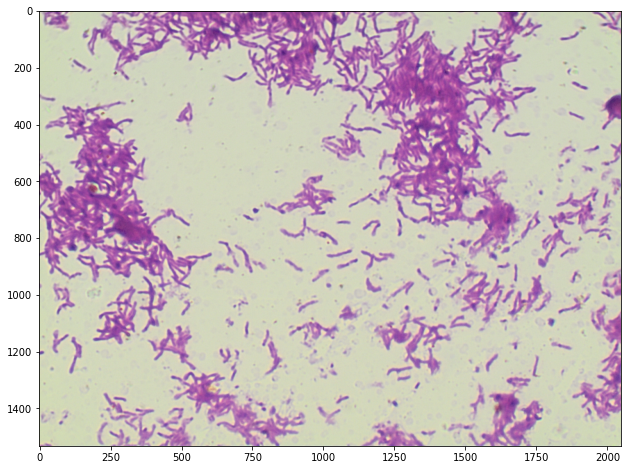

data/Enterococcus_faecalis/Enterococcus.faecalis_0011.tif.png (1532, 2048, 3) 0 255


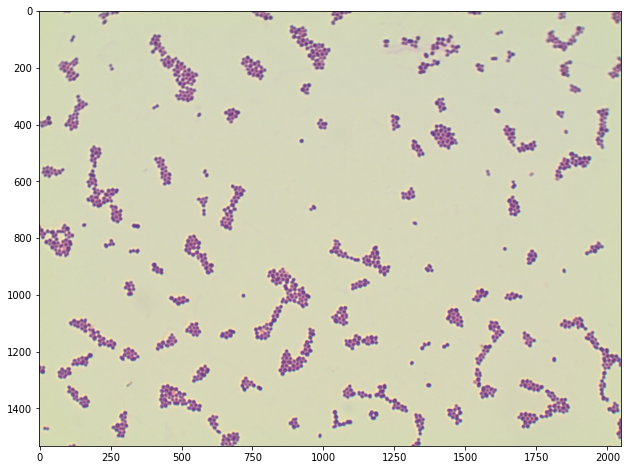

data/Lactobacillus_johnsonii/Lactobacillus.johnsonii_0013.tif.png (1532, 2048, 3) 0 255


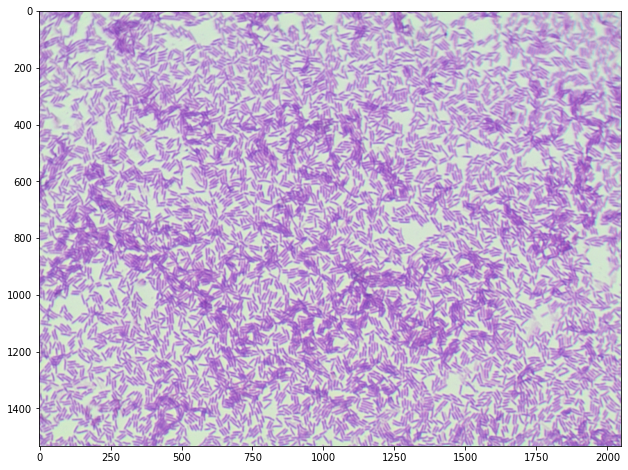

data/Actinomyces_israeli/Actinomyces.israeli_0018.tif.png (1532, 2048, 3) 0 255


In [ ]:
for fname in train_images[:20]:
  img = cv2.imread(fname)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  print(fname, img.shape, img.min(), img.max())
  plt.figure(figsize=(12, 8))
  plt.imshow(img)
  plt.show()

In [ ]:
def extract_patches(images, labels, block_size=224):
  patches = []
  new_labels = []
  for file, label in tqdm(zip(images, labels), total=len(labels)):
    try:
      data = cv2.imread(file)
      data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
      height, width = data.shape[:2]
      for i in range(0, (height // block_size) * block_size, block_size):
        for j in range(0, (width // block_size) * block_size, block_size):
          block = data[i:(i+block_size), j:(j+block_size), :]
          patches.append(block[np.newaxis, ...])
          new_labels.append(label[np.newaxis, ...])
    except BaseException as e:
      print(e)
      print('can\'t open {}'.format(file))
  
  patches = np.vstack(patches)
  new_labels = np.vstack(new_labels)
  return patches, new_labels

In [ ]:
train_x, train_y = extract_patches(train_images, train_labels, block_size=224)
test_x, test_y = extract_patches(test_images, test_labels, block_size=224)

In [ ]:
print(train_x.shape, test_x.shape)

In [ ]:
plt.figure(figsize=(12, 12))
plt.imshow(train_x[4000, :, :, :])
plt.xticks([])
plt.yticks([])
plt.show()

# Train deformable chebychev from scratch


In [ ]:
from matilda.nets.wrn_harm import block
from matilda.nets.wrn_harm import group

In [ ]:
def lr_schedule(epoch):
    lr = 0.0005
    if epoch > 60:
        lr *= 0.2
    if epoch > 120:
        lr *= 0.2
    if epoch > 160:
        lr *= 0.2
    return lr

In [ ]:
levels = [(0, 0), (1, 0), (0, 1), (1, 1), (2, 2)]

In [ ]:
def wrn_harm(input_shape, ftype='chebychev', sz=3, depth=16, width=8, num_classes=10, dropout=0.3):
    assert (depth - 4) % 6 == 0, 'depth should be 6n+4'
    n = (depth - 4) // 6
    widths = [int(v * width) for v in (16, 32, 64)]

    inputs = tf.keras.layers.Input(shape=input_shape, name="image")
    #x = mt.layers.deform.DeformOffset(filters=16, 
    #                                  kernel_size=(3, 3), 
    #                                  padding='same', 
    #                                  num_deformable_group=1,
    #                                  kernel_initializer='glorot_normal')(inputs)
    # x = tf.keras.layers.Reshape(target_shape=(672,672,3))(x)
    x = mt.layers.HarmonicTransform(ftype=ftype, n=3, strides=(1, 3, 3, 1))(inputs)
    #x = mt.layers.AlphaRooting(alpha=0.9, trainable=True, min_value=0.8, max_value=1.2)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = mt.layers.HarmonicCombine(16, activation='relu')(x)

    for width, stride in zip(widths, [1, 2, 2]):
        x = group(x, n, width, stride, dropout=dropout, block_type='lin_harmonic', ftype=ftype, sz=sz, levels=levels)

    x = tf.keras.layers.BatchNormalization(axis=-1,
                                           momentum=0.1,
                                           epsilon=1e-5,
                                           gamma_initializer='uniform')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.AveragePooling2D(pool_size=16)(x)
    y = tf.keras.layers.Flatten()(x)
    outputs = tf.keras.layers.Dense(num_classes,
                                    activation='softmax',
                                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
model = wrn_harm(input_shape=(224, 224, 3), 
                 ftype='chebychev', 
                 sz=3, 
                 depth=16, 
                 width=8, 
                 num_classes=33, 
                 dropout=0.3)

In [ ]:
import livelossplot

In [ ]:
plot_losses = livelossplot.PlotLossesKerasTF()
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

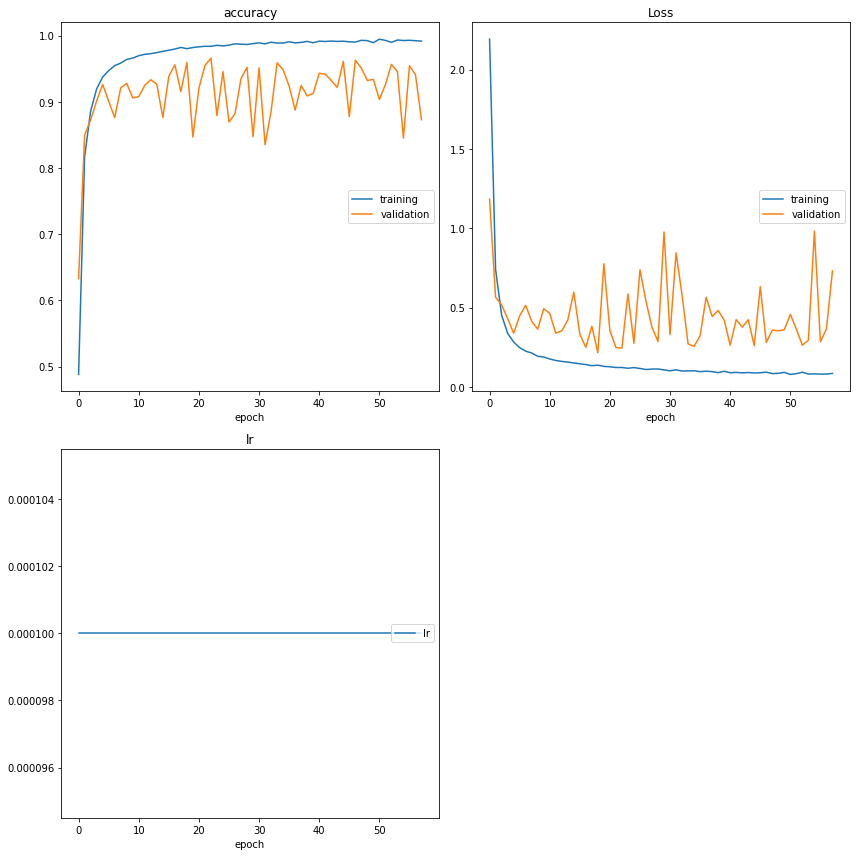

accuracy
	training         	 (min:    0.488, max:    0.994, cur:    0.991)
	validation       	 (min:    0.633, max:    0.966, cur:    0.873)
Loss
	training         	 (min:    0.079, max:    2.191, cur:    0.085)
	validation       	 (min:    0.216, max:    1.183, cur:    0.731)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)
930/930 [==============================] - 116s 125ms/step - loss: 0.0853 - accuracy: 0.9915 - val_loss: 0.7311 - val_accuracy: 0.8729
Epoch 59/200
352/930 [==========>...................] - ETA: 1:06 - loss: 0.0821 - accuracy: 0.9922Buffered data was truncated after reaching the output size limit.

In [ ]:
model.fit(train_x, train_y, batch_size=32, epochs=70, validation_data=(test_x, test_y), callbacks=[reduce_lr, plot_losses])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = model.predict(test_x)

In [ ]:
print(classification_report(np.argmax(y_pred, axis=-1), np.argmax(test_y, axis=-1)))